In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### User Dataframe, Rating Dataframe, Movie Dataframe

In [ ]:
data_path = 'D:/Python/DL/Notebook/ml-100k/'
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
user_df = pd.read_csv(data_path + 'u.user', sep='|', names = u_cols, encoding = 'latin-1')
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
rating_df = pd.read_csv(data_path + 'u.data', sep='\t', names = r_cols, encoding = 'latin-1')
m_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url', 'unknown',
         'action', 'adventure', 'animation', 'children\'s', 'comedy', 'crime', 'documentary', 'drama',
        'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
movie_df = pd.read_csv(data_path + 'u.item', sep='|', names=m_cols, encoding = 'latin-1')

### Movie
Dữ liệu 10 bộ phim đầu tiên

In [ ]:
movie_df.head(10)

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children's,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Thống kê kiểu dữ liệu trong bảng

In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   action              1682 non-null   int64  
 7   adventure           1682 non-null   int64  
 8   animation           1682 non-null   int64  
 9   children's          1682 non-null   int64  
 10  comedy              1682 non-null   int64  
 11  crime               1682 non-null   int64  
 12  documentary         1682 non-null   int64  
 13  drama               1682 non-null   int64  
 14  fantasy             1682 non-null   int64  
 15  film-noir           1682 non-null   int64  
 16  horror

Thống kê các giá trị trong bảng

In [ ]:
movie_df.describe()

,movie_id,video_release_date,unknown,action,adventure,animation,children's,comedy,crime,documentary,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Thống kê phim theo từng thể loại

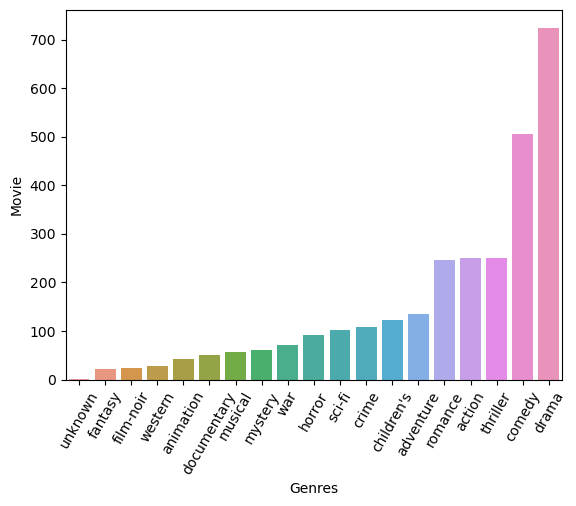

In [ ]:
generes = m_cols[5:]

genres_count = movie_df.loc[:, generes].sum().sort_values()
sns.barplot(x=genres_count.index, y= genres_count.values)
plt.xticks(rotation=60)
plt.xlabel("Genres")
plt.ylabel("Movie")
plt.show()

Thống kê phim theo năm phát hành

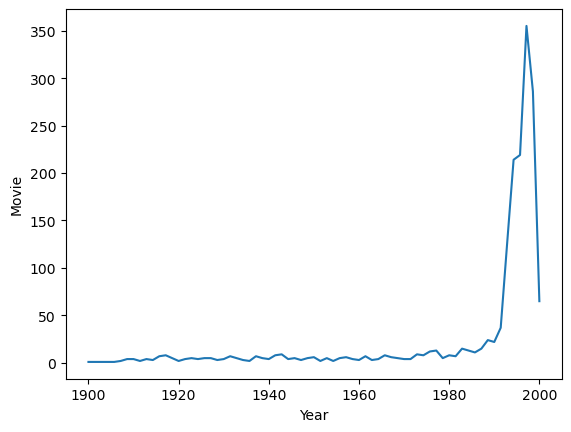

In [ ]:
year_count = movie_df.groupby(movie_df.release_date.str.split('-').str[-1]).size()
sns.lineplot(x=np.linspace(1900, 2000, len(year_count)), y = year_count.values)
plt.xlabel("Year")
plt.ylabel("Movie")
plt.show()

Thống kê phim phát hành theo tháng

<AxesSubplot:>

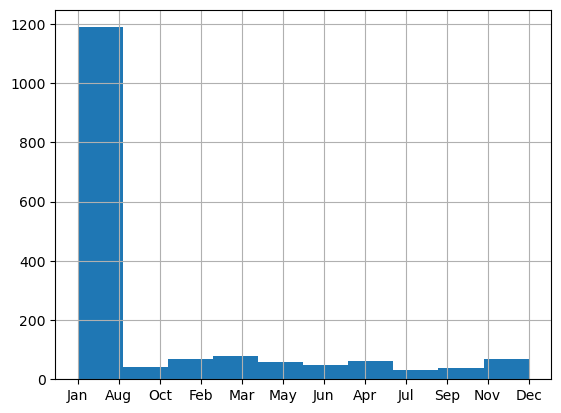

In [ ]:
movie_df.release_date.str.split('-').str[-2].hist()

### Rating
Dữ liệu của 10 rating đầu tiên

In [ ]:
rating_df.head(10)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


Thống kê kiểu dữ liệu rating

In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         100000 non-null  int64
 1   movie_id        100000 non-null  int64
 2   rating          100000 non-null  int64
 3   unix_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
rating_df.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


Thống kê thể loại phim yêu thích theo giới tính của users

In [ ]:
temp_df = rating_user_movie_df.groupby('gender').sum().loc[:,generes]
temp_df = temp_df.transpose()
temp_df

gender,F,M
unknown,12,26
action,6297,14761
adventure,3451,8256
animation,1143,2665
children's,2433,5809
comedy,9437,22131
crime,2342,5429
documentary,526,1188
drama,11523,27333
fantasy,407,1025


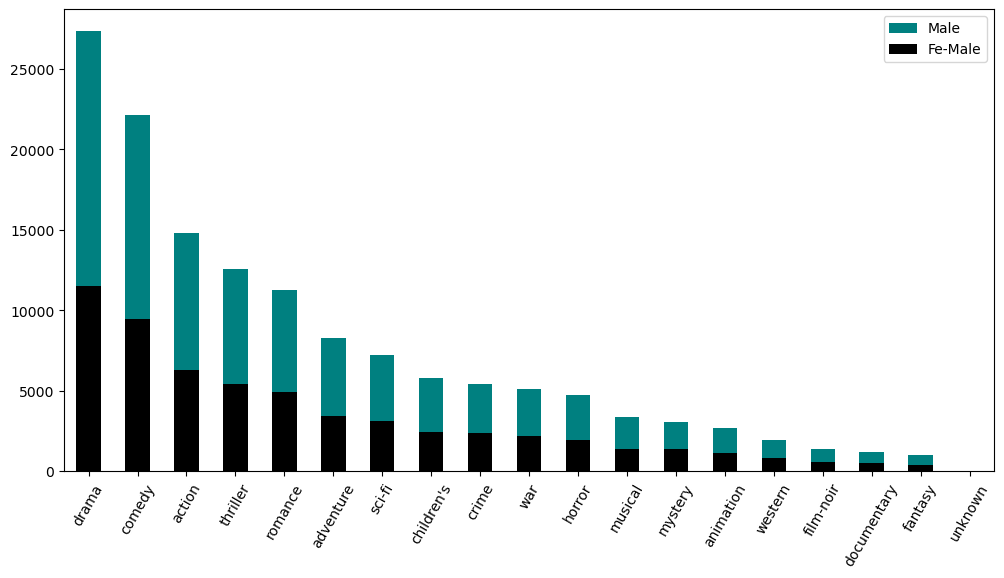

In [ ]:
plt.figure(figsize=(12, 6))

temp_df.M.sort_values(ascending=False).plot(kind='bar', color='teal', label="Male")
temp_df.F.sort_values(ascending=False).plot(kind='bar', color='black', label="Fe-Male")
plt.legend()
plt.xticks(rotation=60)
plt.show()

### User
Dữ liệu 10 user

In [ ]:
user_df.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Thống kê dữ liệu user

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [ ]:
user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


__Thống kê độ tuổi xem phim__ \
Các nhóm tuổi: \
5-12 - Gradeschooler \
13-19 - Teenager \
20-35 - Young \
35-55 - Midlife \
Above 55 - Old 

In [ ]:
user_df['age_group'] = user_df.age.apply(lambda age: 'Gradeschooler' if 5<=age<=12
 else ('Teenager' if 13<=age<=19 else ('Young' if 20<=age<=35 else 
('Midlife' if 35<=age<=55 else 'Old'))))
user_df.sample(5)

,user_id,age,gender,occupation,zip_code,age_group
902,903,28,M,educator,20850,Young
786,787,18,F,student,98620,Teenager
161,162,25,M,artist,15610,Young
135,136,51,M,other,97365,Midlife
844,845,64,M,doctor,97405,Old


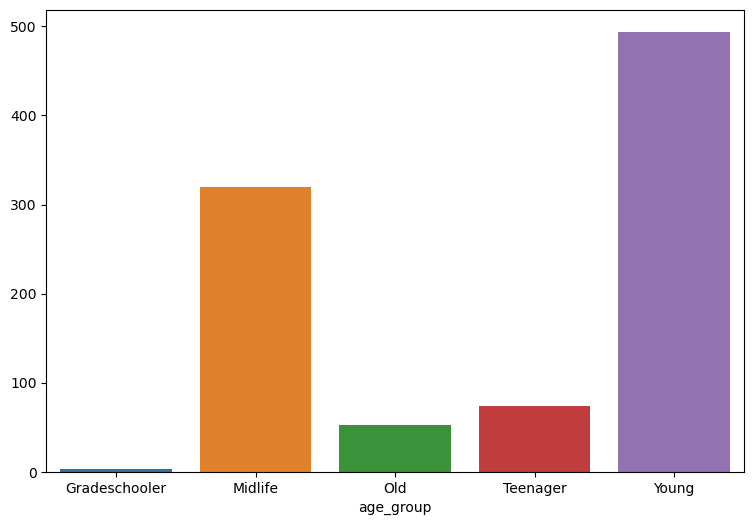

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x = user_df.groupby('age_group').size().index, y = user_df.groupby('age_group').size().values)
plt.show()

__Kết hợp nhiều DataFrames__

In [ ]:
rating_user_df = rating_df.join(other = user_df, how='inner', on='user_id',
                                 lsuffix = '_R')
rating_user_movie_df = rating_user_df.join(other = movie_df, how = 'inner', on =
                                           'movie_id', rsuffix = '_M')
rating_movie_df = rating_df.join(other = movie_df, how ='inner', on = 'movie_id', 
                                 rsuffix='_M')


Thống kê giới tính của các user

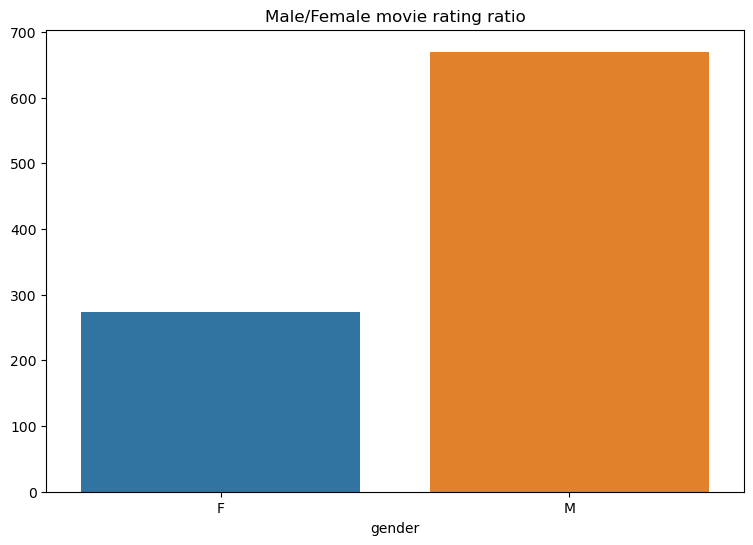

In [ ]:
plt.figure(figsize=(9,6))
gender = user_df.groupby('gender').size()
sns.barplot(x = gender.index, y = gender.values)
plt.title('Male/Female movie rating ratio')
plt.show()

Thống kê user theo nghề nghiệp

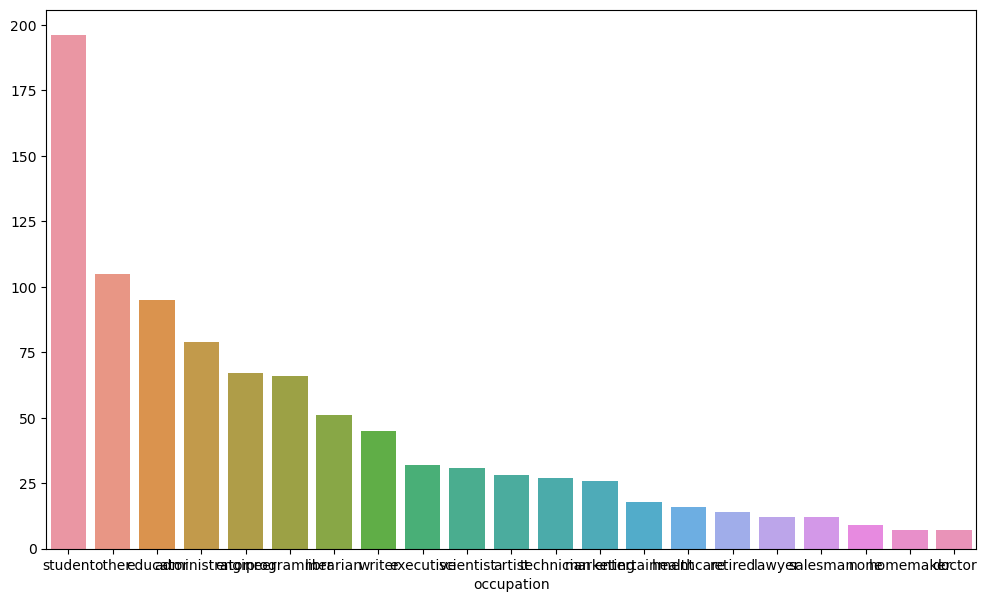

In [ ]:
plt.figure(figsize=(12,7))
movie_watcher_occupants = user_df.groupby('occupation').size().sort_values(ascending=False)
sns.barplot(x = movie_watcher_occupants.index, y = movie_watcher_occupants.values)
plt.show()

In [ ]:
pd.DataFrame(user_df.groupby(['occupation', 'age_group']).size().sort_values(ascending=False))

0
occupation age_group         
student    Young          128
           Teenager        62
other      Young           59
educator   Midlife         51
programmer Young           45
...                       ...
artist     Teenager         1
none       Gradeschooler    1
salesman   Teenager         1
retired    Midlife          1
none       Midlife          1

[62 rows x 1 columns]